# Data Analysis and Visualization

This notebook performs an in-depth analysis of the Master Dataset to uncover trends, correlations, and insights. It includes:

- **Feature Engineering**: Calculation of key metrics to enhance data understanding.
- **Visualizations**: A series of plots to highlight patterns and relationships.

The objective is to make the data more actionable and insights more accessible.


# Step 1: Importing Necessary Libraries

I began by importing the necessary libraries to handle data processing and visualization tasks effectively:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: To perform mathematical operations and handle arrays.
- **Matplotlib**: For creating static, animated, and interactive visualizations.
- **Seaborn**: To create visually appealing and informative statistical graphics.

Additionally, I used `%matplotlib inline` to ensure that all plots are displayed inline within the notebook.


In [1]:
# 1: Importing Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Loading the Dataset

To kick things off, I loaded the master dataset into a Pandas DataFrame using the `read_excel` function. This made it easy to work with the data for further analysis. The dataset is located at:

`../datasets/master_dataset/master_dataset.xlsx`

This step sets the stage for all the analysis and visualizations that follow.


In [2]:
# Load the dataset from the specified file path of the master dataset
file_path = '../datasets/master_dataset/master_dataset.xlsx'
data = pd.read_excel(file_path)

# Step 3: Feature Engineering

To enhance the dataset and make it more useful for analysis, I calculated several key metrics:

- **Click-Through Rate (CTR)**: This measures the percentage of impressions that resulted in clicks, helping to evaluate click efficiency.
- **Conversion Rate**: This shows the percentage of impressions that led to actual sales, providing insights into customer behavior.
- **Sales Per Click**: A metric to understand the effectiveness of each click in generating sales.
- **Day of the Week**: Extracted the day name for each entry based on the date, to analyze weekly trends.
- **Quantity Growth**: Calculated the daily percentage growth in quantity sold to track performance over time.

Finally, I addressed any missing values or infinity issues in the data to ensure the calculations are robust and ready for further analysis.


In [3]:
# FEATURE ENGINEERING CODE
# Calculating metrics for analysis

# Calculating Click-Through Rate (CTR) as a percentage
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100  # CTR helps us measure click efficiency

# Conversion Rate in order to show the percentage of impressions that led to sales
data['Conversion Rate'] = (data['Quantity'] / data['Impressions']) * 100

# Calculating sales per click in order to understand effectiveness
data['Sales Per Click'] = data['Quantity'] / data['Clicks']

# Get the day of the week for each corresponding date entry
data['Day of Week'] = data['Day Index'].dt.day_name()

# Calculating daily growth rate in quantity as a percentage
data['Quantity Growth'] = data['Quantity'].pct_change() * 100

# Handling any missing values or infinities that may affect analysis
data = data.fillna(0).replace([float('inf'), -float('inf')], 0)


# Step 4: Setting Up Visualizations

To create clean and professional-looking visualizations, I configured the plotting style and figure size:

- Used the **`ggplot` style** to give the plots a polished and consistent appearance.
- Set the **figure size** to `(12, 6)` for all plots, ensuring they are clear and easy to interpret.

These configurations provide a strong visual foundation for the graphs that follow.


In [4]:
# VISUALIZATIONS
plt.style.use('ggplot')  # Set the plotting style
plt.rcParams['figure.figsize'] = (12, 6)  # Set figure size for all plots


# Visual 1: Visualizing CTR Over Time

The first visualization explores how the Click-Through Rate (CTR) changes over time. Here's what I did:

- Created a **line plot** to represent CTR trends over the dates.
- Added labels for the x-axis (`Date`) and y-axis (`CTR (%)`) to make the graph easy to understand.
- Included a **legend** and a **grid** for better readability.
- Added a title: "CTR Over Time" to clearly indicate what the plot represents.

This plot helps visualize the efficiency of clicks across different days.


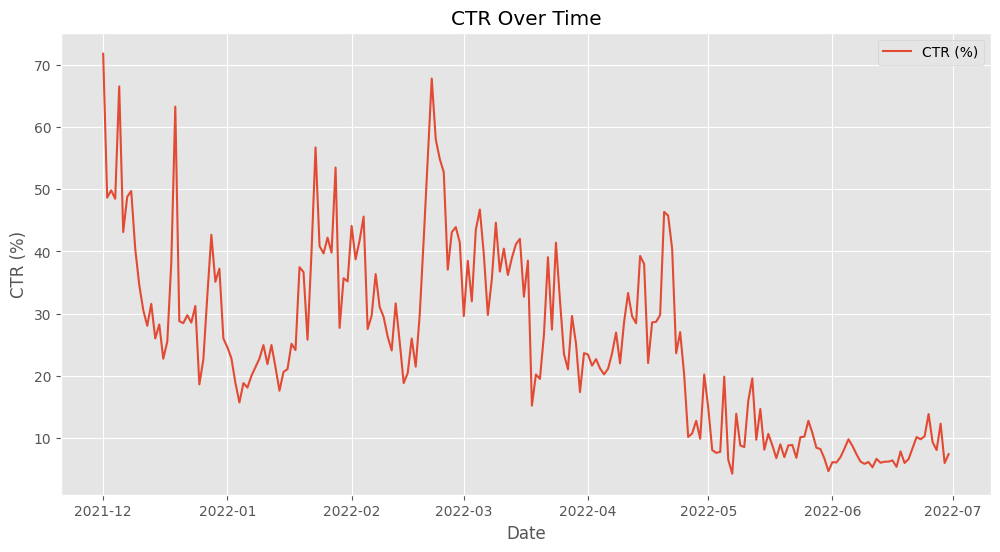

In [5]:
# 1. CTR Over Time Plot
plt.figure()
plt.plot(data['Day Index'], data['CTR'], label='CTR (%)')
plt.title('CTR Over Time')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.legend()
plt.grid(True)
plt.show()

# Visual 2: Visualizing Conversion Rate Over Time

Next, I visualized how the Conversion Rate changes over time to understand customer behavior. Here's what I did:

- Created a **line plot** to showcase the trend in Conversion Rate across different dates.
- Used a distinct **orange color** for the line to differentiate it from other plots.
- Labeled the x-axis as `Date` and the y-axis as `Conversion Rate (%)` for clarity.
- Added a **legend** to highlight the metric and a **grid** to make the plot more readable.
- Titled the graph: "Conversion Rate Over Time" to describe its purpose.

This plot provides valuable insights into the percentage of impressions that led to actual sales over time.


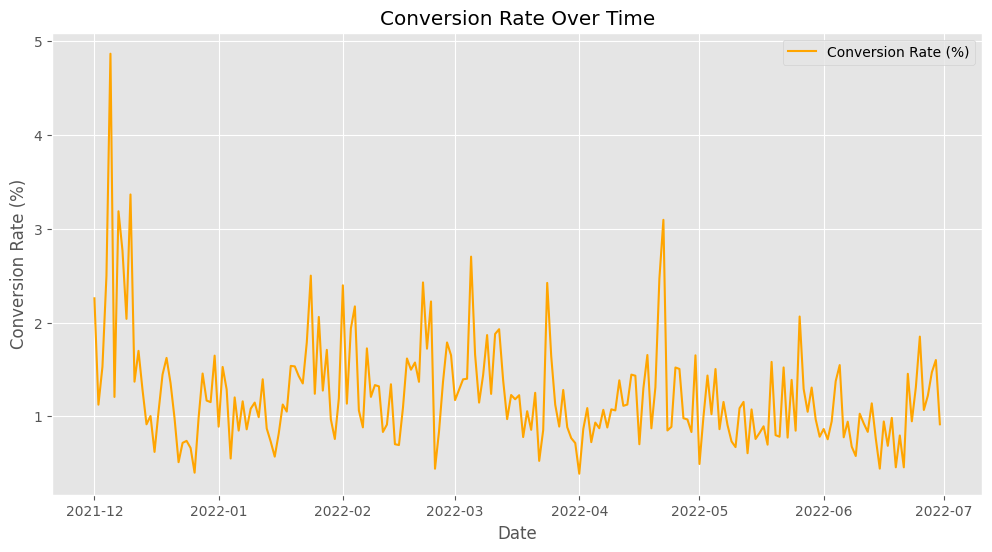

In [6]:
# 2. Conversion Rate Over Time
plt.figure()
plt.plot(data['Day Index'], data['Conversion Rate'], label='Conversion Rate (%)', color='orange')
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Visual 3: Distribution of Sales Per Click

To understand the effectiveness of each click in generating sales, I plotted the distribution of Sales Per Click. Here's how I approached it:

- Created a **histogram** with 20 bins to show the distribution of this metric.
- Used a **purple color** for the bars with black edges for better contrast.
- Labeled the x-axis as `Sales Per Click` and the y-axis as `Frequency` to clarify the plot's dimensions.
- Titled the graph: "Distribution of Sales Per Click" to convey its purpose.

This visualization highlights the frequency of different sales efficiencies, helping to identify patterns or anomalies.


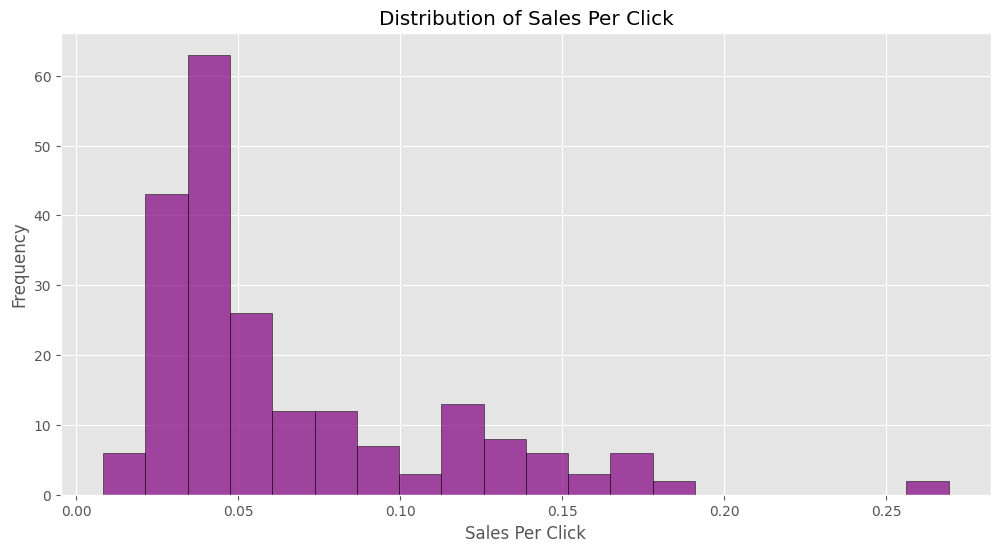

In [7]:
# 3. Sales Per Click Distribution
plt.figure()
plt.hist(data['Sales Per Click'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Sales Per Click')
plt.xlabel('Sales Per Click')
plt.ylabel('Frequency')
plt.show()


# Visual 4: Average Quantity by Day of the Week

To analyze sales trends across the week, I calculated the average quantity sold for each day. Here's how I visualized it:

- **Grouped the data by day of the week** and calculated the average quantity sold for each day.
- Ensured the days were ordered from Monday to Sunday for better readability.
- Created a **bar plot** with green bars and black edges to make the visualization clean and visually appealing.
- Labeled the x-axis as `Day of the Week` and the y-axis as `Average Quantity`.
- Added a title: "Average Quantity by Day of the Week" to describe the graph's purpose.

This plot provides insights into which days of the week perform best in terms of sales.


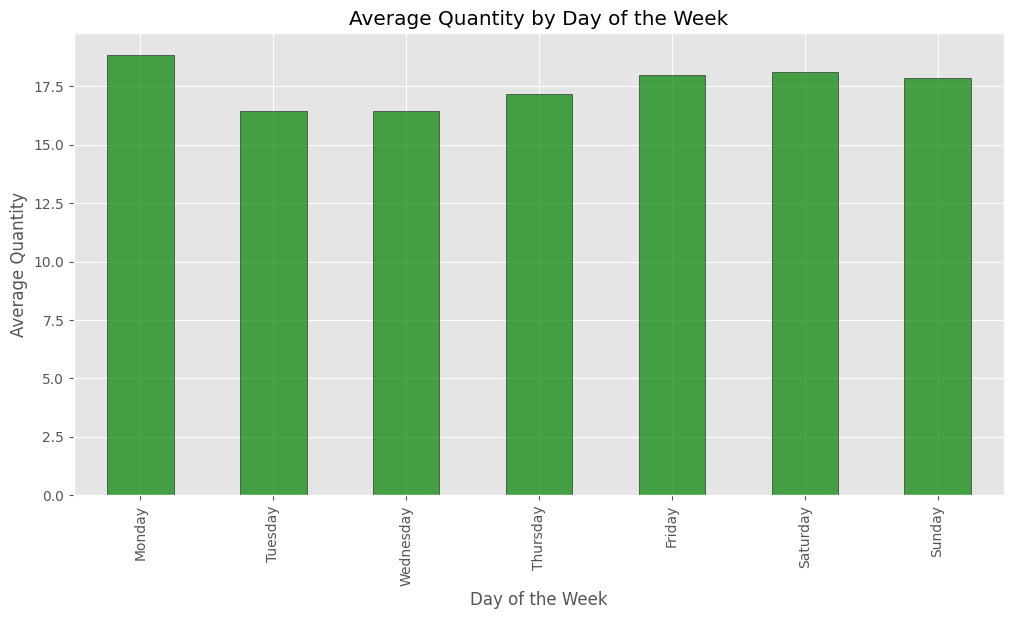

In [8]:
# 4. Average Quantity by Day of the Week
average_quantity = data.groupby('Day of Week')['Quantity'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure()
average_quantity.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Average Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Quantity')
plt.show()

# Visual 5: Day-over-Day Growth for Quantity

To track the daily changes in quantity sold, I visualized the day-over-day growth percentage. Here's how I structured the analysis:

- Created a **histogram** with 20 bins to show the distribution of daily growth rates.
- Used a **blue color** for the bars with black edges for better contrast.
- Labeled the x-axis as `Growth (%)` to indicate the percentage change and the y-axis as `Frequency` to represent the count of occurrences.
- Added a title: "Day-over-Day Growth for Quantity" to summarize the purpose of the graph.

This plot highlights the frequency of growth rates, helping identify days with significant increases or decreases in quantity sold.


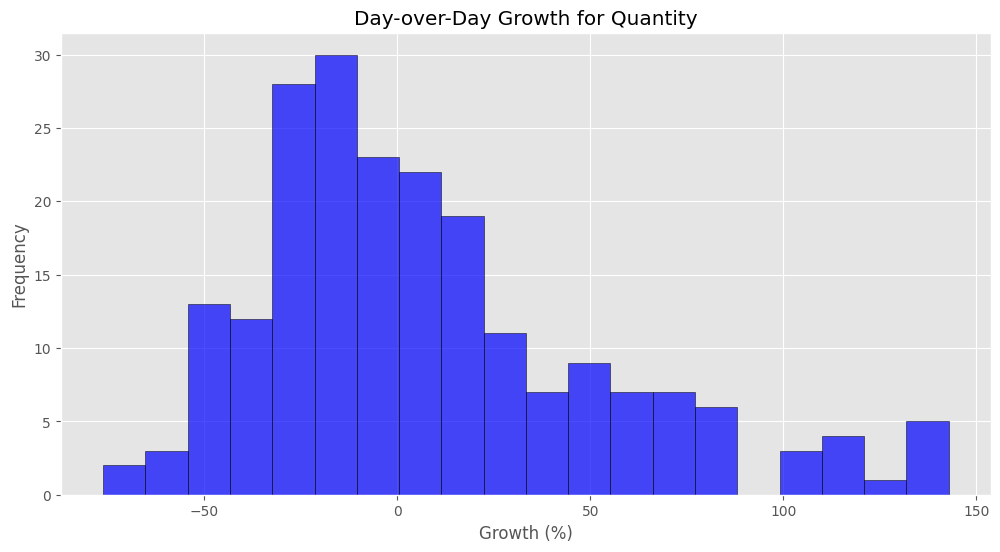

In [9]:
# 5. Day-over-Day Growth for Quantity
plt.figure()
plt.hist(data['Quantity Growth'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Day-over-Day Growth for Quantity')
plt.xlabel('Growth (%)')
plt.ylabel('Frequency')
plt.show()

# Visual 6: Clicks vs Quantity Scatter Plot

To explore the relationship between clicks and quantity sold, I created a scatter plot. Here's what I did:

- Plotted **Clicks** on the x-axis and **Quantity** on the y-axis to show their correlation.
- Used a **red color** for the points to make them stand out.
- Set the transparency (`alpha=0.7`) to better visualize overlapping points.
- Added labels for the axes (`Clicks` and `Quantity`) and a **grid** for easier interpretation.
- Titled the plot: "Clicks vs Quantity" to clearly define its purpose.

This visualization helps in understanding how clicks impact the number of items sold.


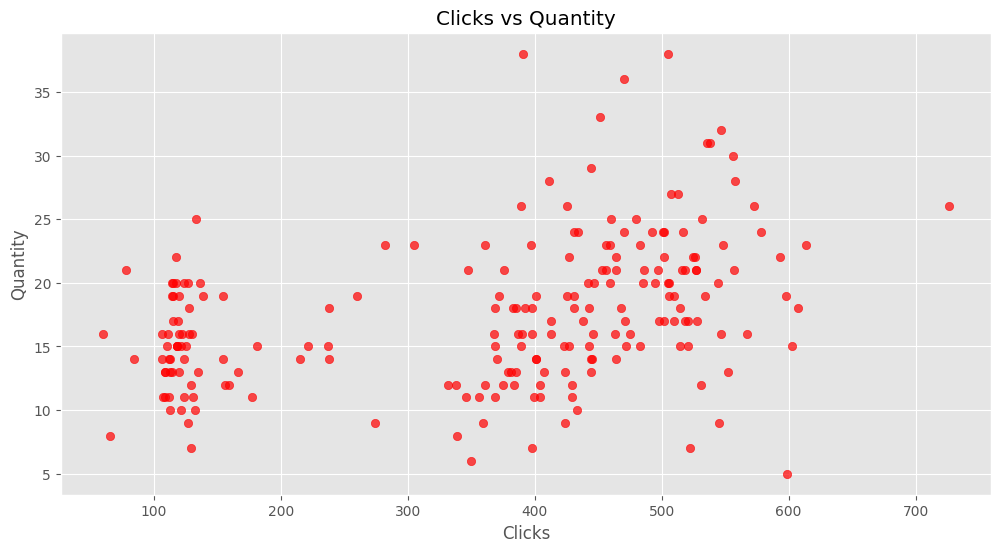

In [10]:
# 6. Clicks vs Quantity Scatter Plot
plt.figure()
plt.scatter(data['Clicks'], data['Quantity'], alpha=0.7, color='red')
plt.title('Clicks vs Quantity')
plt.xlabel('Clicks')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

# Visual 7: Impressions vs Quantity Scatter Plot

To examine the relationship between impressions and quantity sold, I created a scatter plot. Here's how I approached it:

- Plotted **Impressions** on the x-axis and **Quantity** on the y-axis to observe their correlation.
- Used a **teal color** for the points to differentiate this plot from others.
- Set transparency (`alpha=0.7`) to handle overlapping points effectively.
- Labeled the axes as `Impressions` and `Quantity` for clarity.
- Added a **grid** to make the plot easier to interpret.
- Titled the plot: "Impressions vs Quantity" to summarize its focus.

This plot provides insights into how the number of impressions impacts the quantity of items sold.


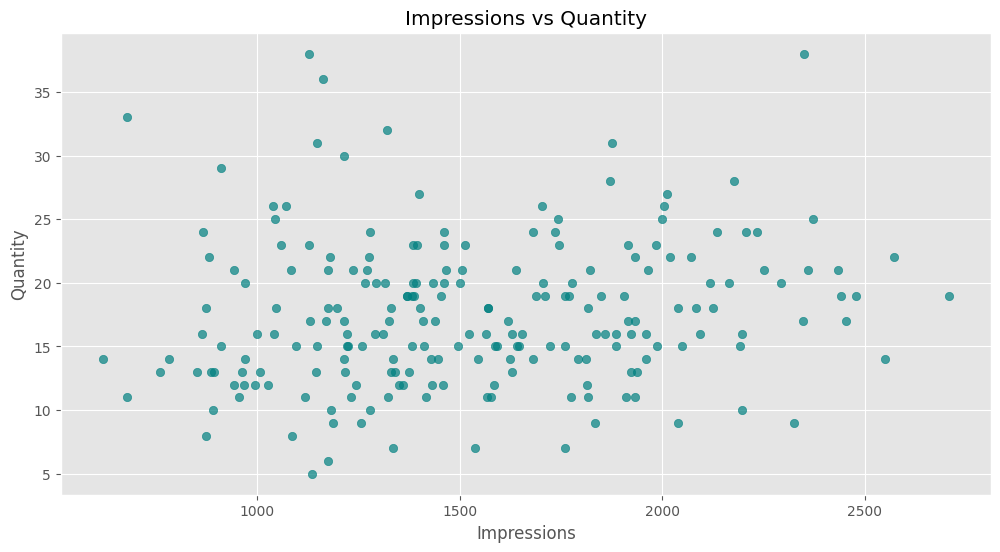

In [11]:
# 7. Impressions vs Quantity Scatter Plot
plt.figure()
plt.scatter(data['Impressions'], data['Quantity'], alpha=0.7, color='teal')
plt.title('Impressions vs Quantity')
plt.xlabel('Impressions')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

# Visual 8: Correlation Heatmap

To analyze the relationships between key metrics, I created a correlation heatmap. Here's what I did:

- Calculated the **correlation matrix** for the following metrics: Clicks, Impressions, Quantity, CTR, and Conversion Rate.
- Used Seaborn's **`heatmap`** to visualize the correlations.
- Included annotations (`annot=True`) to display the correlation values directly on the heatmap.
- Applied the **`coolwarm` colormap** to make the heatmap visually appealing and easy to interpret.
- Titled the graph: "Correlation Heatmap" to clearly indicate its purpose.

This heatmap highlights the strength and direction of relationships between key metrics, providing valuable insights into their interdependencies.


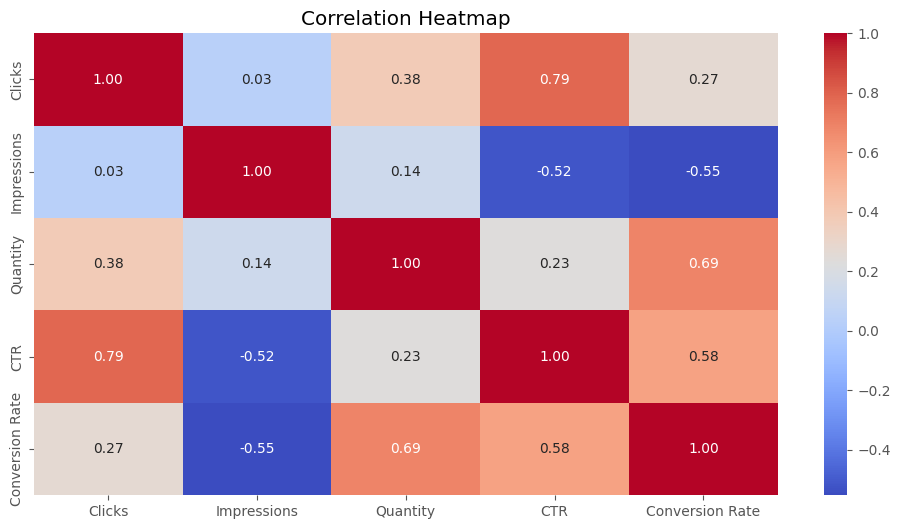

In [12]:
# 8. Correlation Heatmap
correlation_matrix = data[['Clicks', 'Impressions', 'Quantity', 'CTR', 'Conversion Rate']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visual 9: Monthly Trends

To understand how key metrics vary over time, I analyzed monthly trends. Here's how I visualized the data:

- Resampled the data by month using the `resample` method with the start of each month as the frequency (`'MS'`).
- Summed up the values for **Quantity**, **Clicks**, and **Impressions** to observe their monthly totals.
- Created a **line plot** to show the trends for these metrics over time.
- Labeled the x-axis as `Month` and the y-axis as `Counts` to represent the time and aggregated values.
- Added a **legend** to differentiate between the metrics and a title: "Monthly Trends for Quantity, Clicks, and Impressions."

This visualization provides a clear picture of how these metrics evolve on a monthly basis, helping to identify seasonal patterns or significant changes.


<Figure size 1200x600 with 0 Axes>

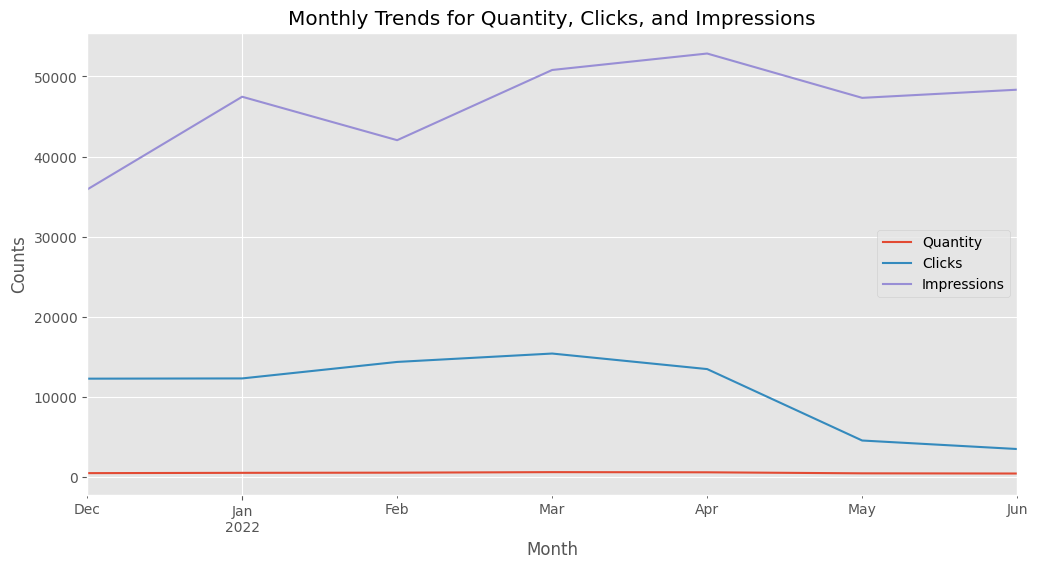

In [13]:
# 9. Monthly Trends
monthly_data = data.resample('MS', on='Day Index').sum()
plt.figure()
monthly_data[['Quantity', 'Clicks', 'Impressions']].plot()
plt.title('Monthly Trends for Quantity, Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.legend()
plt.show()


# Visual 10: Weekday vs Weekend Analysis for Quantity

To compare performance between weekdays and weekends, I analyzed the average metrics for these periods. Here's how I approached it:

- Added a new column, **`Weekend`**, to the dataset, assigning `1` for Saturdays and Sundays and `0` for weekdays.
- Grouped the data by this new column and calculated the average for **Quantity**, **Clicks**, and **Impressions**.
- Created a **bar plot** to visualize the differences between weekdays and weekends.
- Labeled the x-axis as `Weekend (0=Weekday, 1=Weekend)` and the y-axis as `Average Counts` to clarify the plot.
- Titled the graph: "Weekday vs Weekend Average for Quantity, Clicks, and Impressions."

This analysis highlights whether weekends perform better or worse compared to weekdays in terms of key metrics.


<Figure size 1200x600 with 0 Axes>

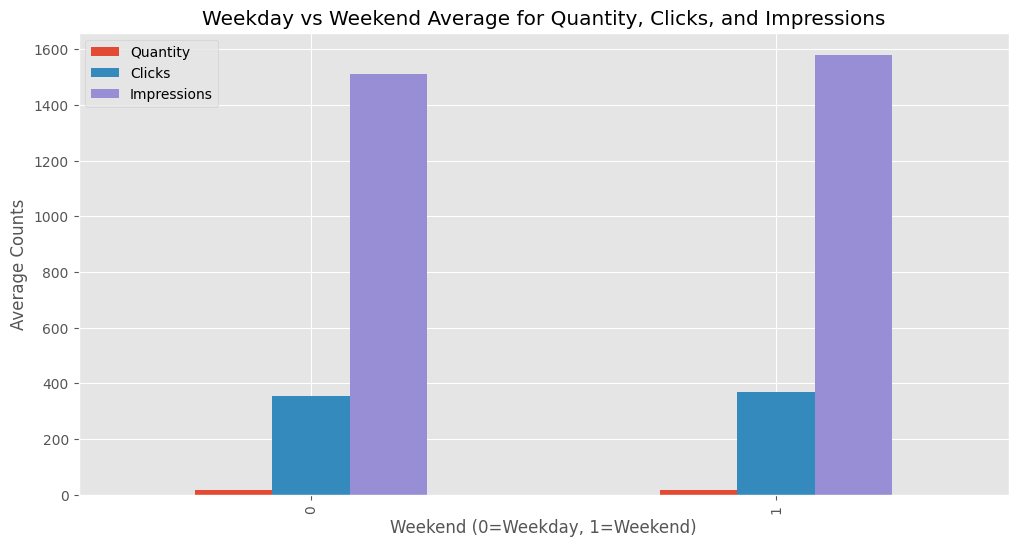

In [14]:
# 10. Weekday vs Weekend Analysis for Quantity
data['Weekend'] = data['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)
weekday_weekend_avg = data.groupby('Weekend')[['Quantity', 'Clicks', 'Impressions']].mean()
plt.figure()
weekday_weekend_avg.plot(kind='bar')
plt.title('Weekday vs Weekend Average for Quantity, Clicks, and Impressions')
plt.xlabel('Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Average Counts')
plt.show()

# Visual 11: Quarterly Trends

To analyze long-term trends, I aggregated the data by quarters. Here's how I visualized it:

- Added a new column, **`Quarter`**, by converting the date column to quarterly periods using `.dt.to_period('Q')`.
- Grouped the data by the `Quarter` column and calculated the sum for **Quantity**, **Clicks**, and **Impressions**.
- Created a **line plot** to display the quarterly trends for these metrics.
- Labeled the x-axis as `Quarter` and the y-axis as `Counts` to represent the time periods and their totals.
- Added a **legend** to differentiate the metrics and titled the graph: "Quarterly Trends for Quantity, Clicks, and Impressions."

This visualization helps to identify seasonal patterns and overall performance changes over multiple quarters.


<Figure size 1200x600 with 0 Axes>

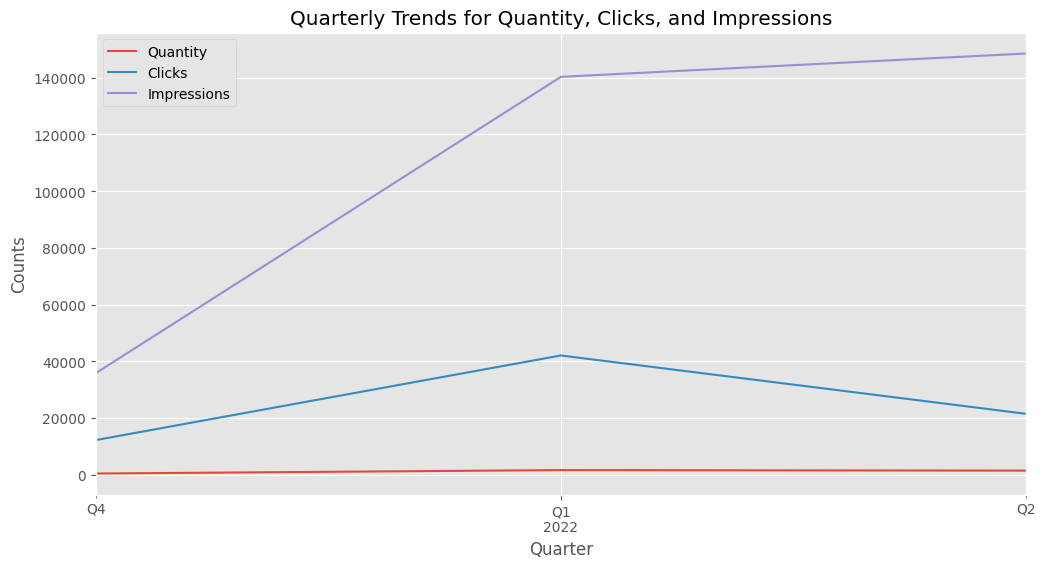

In [15]:
# 11. Quarterly Trends
data['Quarter'] = data['Day Index'].dt.to_period('Q')
quarterly_data = data.groupby('Quarter')[['Quantity', 'Clicks', 'Impressions']].sum()
plt.figure()
quarterly_data.plot()
plt.title('Quarterly Trends for Quantity, Clicks, and Impressions')
plt.xlabel('Quarter')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Visual 12: Log-Transformed Distributions for Clicks and Impressions

To better visualize the distributions of Clicks and Impressions, I applied a logarithmic transformation. Here's how I proceeded:

- Created two new columns:
  - **`Log Clicks`**: The natural logarithm of Clicks, computed with `np.log1p` to handle zero values.
  - **`Log Impressions`**: The natural logarithm of Impressions, also using `np.log1p`.
- Plotted histograms for the log-transformed values:
  - For **Log Clicks**, used a **sky-blue color** and labeled the x-axis as `Log Clicks` and the y-axis as `Frequency`.
  - For **Log Impressions**, used a **salmon color** with similar labeling.
- Added titles to both plots:
  - "Log-Transformed Clicks Distribution"
  - "Log-Transformed Impressions Distribution"

These visualizations help normalize the data, making patterns and outliers more evident.


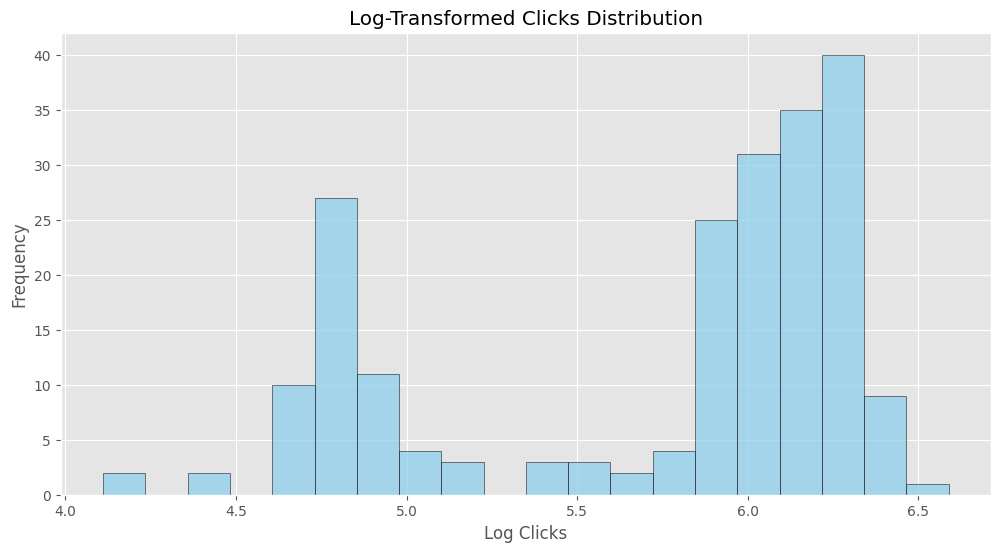

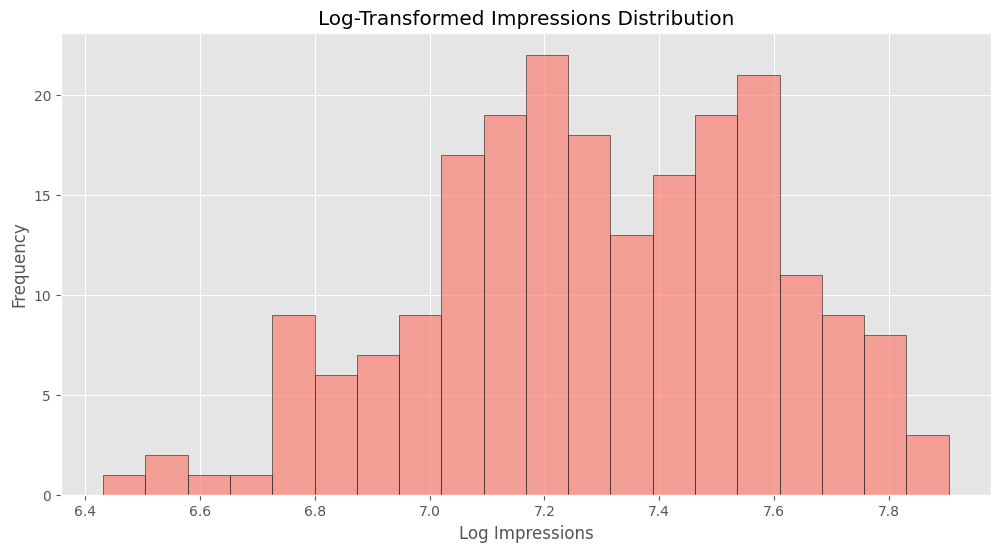

In [16]:
# 12. Log-Transformed Clicks and Impressions Distributions
data['Log Clicks'] = np.log1p(data['Clicks'])
data['Log Impressions'] = np.log1p(data['Impressions'])
plt.figure()
plt.hist(data['Log Clicks'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Clicks Distribution')
plt.xlabel('Log Clicks')
plt.ylabel('Frequency')
plt.show()

plt.figure()
plt.hist(data['Log Impressions'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
plt.title('Log-Transformed Impressions Distribution')
plt.xlabel('Log Impressions')
plt.ylabel('Frequency')
plt.show()

# Visual 13: Box Plot for Outlier Detection

To identify outliers in the data, I created a box plot for key metrics. Here's what I did:

- Plotted a **box plot** for the following columns: **Clicks**, **Impressions**, and **Quantity**.
- Used Seaborn's `boxplot` function to effectively visualize the spread and detect outliers.
- Titled the plot: "Box Plot for Outlier Detection" to clearly indicate its purpose.

This visualization highlights the distribution and any potential outliers for these key metrics, providing insights into data variability.


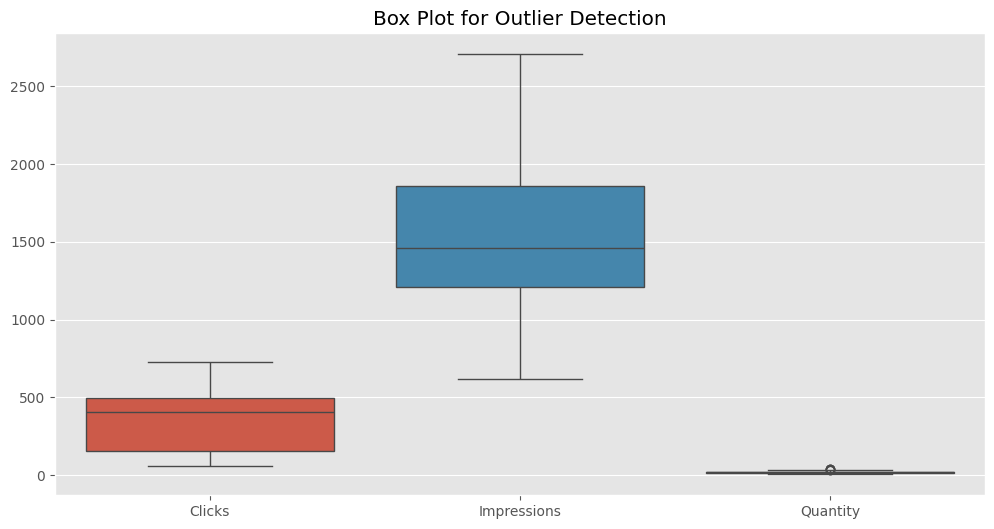

In [17]:
# 13. Box Plot for Outlier Detection in Clicks, Impressions, and Quantity
plt.figure()
sns.boxplot(data=data[['Clicks', 'Impressions', 'Quantity']])
plt.title('Box Plot for Outlier Detection')
plt.show()